In [86]:
from __future__ import division
import os
import numpy as np
import pandas as pd
import seaborn as sns 

In [64]:
sns.set(style="white", palette="muted", color_codes=True)
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Create fake data for the stat tutorial
simulate a dataset that can be used to demonstrate basic stat tools in R. 
The dataset will have two dependent variables, and one independent variable with 3 levels:

*DV: IQ*

*DV: nose dwell time (time spent fixating on nose)*

*IV: face_type*
    - level 1: movie star
    - level 2: athlete
    - level 3: nobel laureate

### Make population distributions for all variables

In [48]:
# set the seed for reproducibility
np.random.seed(100)

In [52]:
### Make IQ and nose dwell time on athletes correlated
# IQ: mean-100, std-15; nose_athlete: mean-300; std-20
IQ = np.array([55, 145])   # start as array of mean +/- 3 std. deviations
nose_athlete = np.array([240,360])
means = [IQ.mean(), nose_athlete.mean()]
stds = [IQ.std()/3, nose_athlete.std()/3]
corr = 0.6
covs = [[stds[0]**2, stds[0]*stds[1]*corr], [stds[0]*stds[1]*corr, stds[1]**2]]
tmp = np.random.multivariate_normal(means, covs, 500)

IQ = tmp[:,0]
noseAthlete = tmp[:,1]

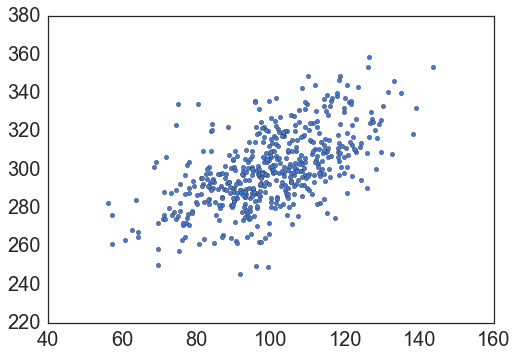

In [65]:
#### show correlation
plt.scatter(IQ, noseAthlete);

In [50]:
# create remaining vars
noseMovie = np.random.normal(loc=250, scale=25, size=500)
noseNobel = np.random.normal(loc=350, scale=50, size=500)

([<matplotlib.axis.XTick at 0x11a453ad0>,
 <a list of 3 Text xticklabel objects>)

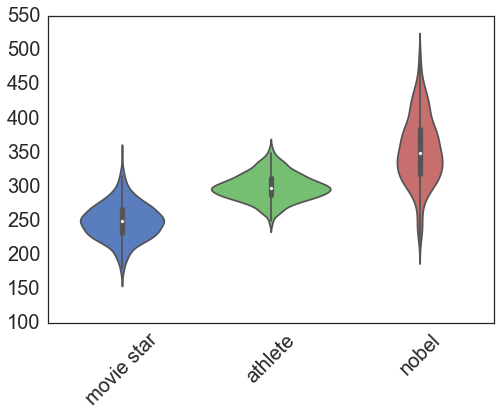

In [66]:
sns.violinplot(data=[noseMovie, noseAthlete, noseNobel])
plt.xticks(np.arange(3), ['movie star', 'athlete', 'nobel'], rotation=45)

### Randomly sample 40 subjects from the distributions

In [84]:
# set up indices to sample from
indices = np.random.choice(500, 40, replace=False)

IQ_samp = IQ[indices]
noseMovie_samp = noseMovie[indices]
noseAthlete_samp = noseAthlete[indices]
noseNobel_samp = noseNobel[indices]

Plot one of the samples vs. the original population

In [78]:
import matplotlib.patches as mpatches

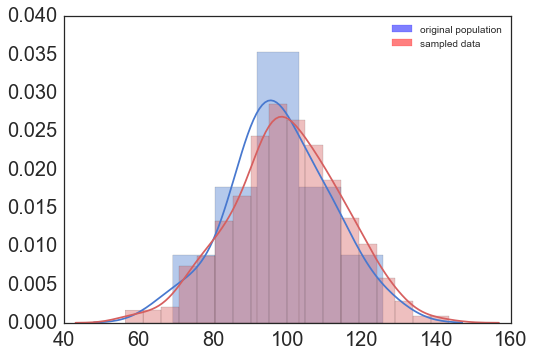

In [82]:
sns.distplot(IQ_samp)
sns.distplot(IQ, color="r")

# specify legend
blue_patch = mpatches.Patch(color='blue', alpha=.5, label='original population')
red_patch = mpatches.Patch(color='red', alpha=.5, label='sampled data')
plt.legend(handles=[blue_patch, red_patch])

### Make dataframe of this data

In [92]:
# add subject name column
subjs = []
for s in range(1,41):
    subjs.append('subject_' + str(s))

In [105]:
d = {'subjs':subjs, 'IQ': IQ_samp.astype(int), 'noseMovie': noseMovie_samp, 'noseAthlete': noseAthlete_samp, 'noseNobel':noseNobel_samp}
df = pd.DataFrame(d)

In [107]:
# reorder
cols = ['subjs', 'IQ', 'noseMovie', 'noseAthlete', 'noseNobel']
df = df[cols]

df.head()

,subjs,IQ,noseMovie,noseAthlete,noseNobel
0,subject_1,100,199.776435,317.332110,415.080511
1,subject_2,57,228.937100,261.229745,368.763759
2,subject_3,96,316.185475,262.315500,382.978173
3,subject_4,82,232.227439,294.832436,328.462293
4,subject_5,89,277.992903,288.205683,307.443396


In [108]:
# write dataframe to file
df.to_csv('exampleData.tsv', sep='\t', float_format='%.2f', index=False)